# Prediksi Harga Rumah

- data dan kode diperoleh dari https://github.com/adimasmudi/house_prediction
- link kode: https://github.com/GilangAgungS/house-prediction-fix1


## Import Data yang digunakan

In [1]:
import pandas as pd

import dengan lokasi file di google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import file yang berada di komputer (local)

In [3]:
#dataset = pd.read_csv('kc_house_data.csv')

## 1. Data Understanding

Memanggil library yang dibutuhkan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

membuka dataset

In [5]:
# Membuka file data dari google drive

dataset = pd.read_csv('/content/drive/My Drive/latian prediksi harga rumah/kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# Membuka file data dari komputer (local)

#df = pd.read_csv('kc_house_data.csv')
#df

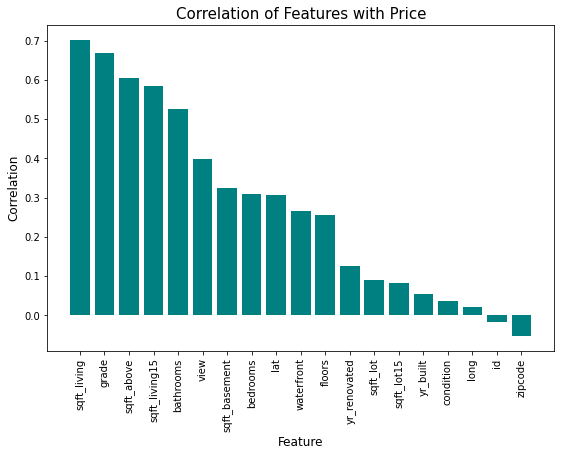

In [7]:
# Melihat variabel yang paling berpengaruh terhadap harga
cor = dataset.corr()['price'].sort_values(ascending=False).drop(['price'])
f=plt.figure(figsize=(20,6))

f.add_subplot(1,2,1)
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

dari grafik di atas kita bisa melihat variabel apa saja yang memiliki korelasi yang tinggi terhadap harga, kita akan menggunakan beberapa variabel dengan korelasi tinggi seperti 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', dan 'floors'


- Variabel independen: 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', dan 'floors'
- Variabel dependen (yang dipengaruhi oleh variabel independen): 'price'

membuat variabel dataFrame yang berisi data independen dan dependen yang dibutuhkan

In [8]:
# Memuat data dari google drive
dataFrame = pd.read_csv('/content/drive/My Drive/latian prediksi harga rumah/kc_house_data.csv', usecols=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms','floors','price', 'yr_built'])

# Memuat data dari komputer (local)
# dataFrame = pd.read_csv('kc_house_data.csv', usecols=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms','floors','price', 'yr_built'])
# dataFrame

Penjelasan dari kolom diatas:
- price : harga rumah ($)
- bedrooms : jumlah kamar tidur
- bathrooms : jumlah kamar mandi
- sqft_living : luas ruangan dalam satuan sqft (square feet)
- floors : jumlah lantai
- grade : klasifikasi dari kelas rumah
- sqft_above : luas ruangan di atas tanah
- sqft_living15 : rata-rata luas tanah dari 15 tetangga terdekat

Melihat 10 data teratas

In [9]:
#melihat 10 data teratas
dataFrame.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1.00,1180,1.0,7,1180,1955,1340
1,538000.0,3,2.25,2570,2.0,7,2170,1951,1690
2,180000.0,2,1.00,770,1.0,6,770,1933,2720
3,604000.0,4,3.00,1960,1.0,7,1050,1965,1360
4,510000.0,3,2.00,1680,1.0,8,1680,1987,1800
5,1225000.0,4,4.50,5420,1.0,11,3890,2001,4760
6,257500.0,3,2.25,1715,2.0,7,1715,1995,2238
7,291850.0,3,1.50,1060,1.0,7,1060,1963,1650
8,229500.0,3,1.00,1780,1.0,7,1050,1960,1780
9,323000.0,3,2.50,1890,2.0,7,1890,2003,2390


Melihat 10 data terbawah

In [10]:
#melihat data terbawah
dataFrame.tail(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
21603,507250.0,3,2.50,2270,2.0,8,2270,2003,2270
21604,429000.0,3,2.00,1490,3.0,8,1490,2014,1400
21605,610685.0,4,2.50,2520,2.0,9,2520,2014,2520
21606,1007500.0,4,3.50,3510,2.0,9,2600,2009,2050
21607,475000.0,3,2.50,1310,2.0,8,1180,2008,1330
21608,360000.0,3,2.50,1530,3.0,8,1530,2009,1530
21609,400000.0,4,2.50,2310,2.0,8,2310,2014,1830
21610,402101.0,2,0.75,1020,2.0,7,1020,2009,1020
21611,400000.0,3,2.50,1600,2.0,8,1600,2004,1410
21612,325000.0,2,0.75,1020,2.0,7,1020,2008,1020


Melihat jumlah baris dan kolom

In [11]:
#melihat jumlah baris dan kolom
dataFrame.shape

(21613, 9)

Melihat nama kolom, jumlah data, dan tipe data

In [12]:
#melihat nama kolom, jumlah data, dan tipe data
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   grade          21613 non-null  int64  
 6   sqft_above     21613 non-null  int64  
 7   yr_built       21613 non-null  int64  
 8   sqft_living15  21613 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


dari data diatas dapat dilihat bahwa kolom 'bathrooms' dan 'floors' memiliki tipe data float, kita perlu ubah menjadi integer karena nilai dari kolom 'bathrooms' dan 'floors' harus bilangan bulat

Melihat nilai dengan jumlah data yang ada pada kolom 'bedrooms'

In [13]:
#melihat nilai dengan jumlah data terbanyak pada kolom 'bedrooms'
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

dari data diatas menunjukkan ada 'bedrooms' dengan nilai 33, nilai tersebut dirasa kurang masuk akal untuk sebuah rumah, jadi kita akan menghapusnya di tahap selanjutnya 

## 2. Data Preparation
#### Data preparation adalah proses pengumpulan, penggabungan, penataan, dan pengorganisasian data sehingga dapat digunakan dalam analitik, dan visualisasi data

In [14]:
#melihat data yang kosong
dataFrame.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
grade            0
sqft_above       0
yr_built         0
sqft_living15    0
dtype: int64

Dari hasil diatas tidak ada data yang kosong, sehingga tidak perlu melakukan manipulasi data kosong

Mengubah tipe data pada kolom 'bathrooms' (dari float ke integer) karena data 'bathroom' harus bilangan bulat

In [15]:
#mengubah tipe data kolom 'bathrooms' menjadi integer(int)
dataFrame['bathrooms'] = dataFrame['bathrooms'].astype(int)
dataFrame.dtypes

price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
floors           float64
grade              int64
sqft_above         int64
yr_built           int64
sqft_living15      int64
dtype: object

Mengubah tipe data pada kolom 'floors' (dari float ke integer) karena data 'floors' harus bilangan bulat

In [16]:
#mengubah tipe data kolom 'floors' menjadi integer(int)
dataFrame['floors'] = dataFrame['floors'].astype(int)
dataFrame.dtypes


price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
floors             int64
grade              int64
sqft_above         int64
yr_built           int64
sqft_living15      int64
dtype: object

Menghapus nilai 33 pada kolom 'bedroom'

In [17]:
#menghapus data dengan 'bedrooms' dengan nilai 33
dataFrame = dataFrame[dataFrame['bedrooms'] != 33]


In [18]:
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Cek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan

In [19]:
#cek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan
dataFrame[dataFrame['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15


dari hasil diatas menunjukkan bahwa sudah tidak ada nilai 33 pada kolom 'bedrooms'

Melihat rangkuman statistik seperti rata-rata, median, dll pada kolom

In [20]:
# Melihat rangkuman statistik seperti rata-rata, median, dll pada kolom
dataFrame.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
count,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,1.749769,2079.921016,1.446234,7.656904,1788.425319,1971.006247,1986.582871
std,3.671351e+05,0.907982,0.734872,918.456818,0.551898,1.175477,828.094487,29.373636,685.392610
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,290.000000,1900.000000,399.000000
25%,3.218375e+05,3.000000,1.000000,1426.500000,1.000000,7.000000,1190.000000,1951.000000,1490.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,1.000000,7.000000,1560.000000,1975.000000,1840.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,2.000000,8.000000,2210.000000,1997.000000,2360.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.000000,13.000000,9410.000000,2015.000000,6210.000000


### EDA(Exploratory Data Analysis)
#### Exploratory Data Analysis adalah proses untuk melihat pola-pola tertentu dalam data

In [21]:
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1,1180,1,7,1180,1955,1340
1,538000.0,3,2,2570,2,7,2170,1951,1690
2,180000.0,2,1,770,1,6,770,1933,2720
3,604000.0,4,3,1960,1,7,1050,1965,1360
4,510000.0,3,2,1680,1,8,1680,1987,1800


Membuat pairplot untuk melihat hubungan antar variabel

In [22]:
# membuat pairplot untuk melihat hubungan antar variabel
# sns.pairplot(dataFrame)

### Melakukan Univariate Analysis 
#### Univariate Analysis berfungsi untuk menganalisa tiap variabel tanpa melihat hubungan dengan variabel lain.

univariate analysis variabel 'bedrooms'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


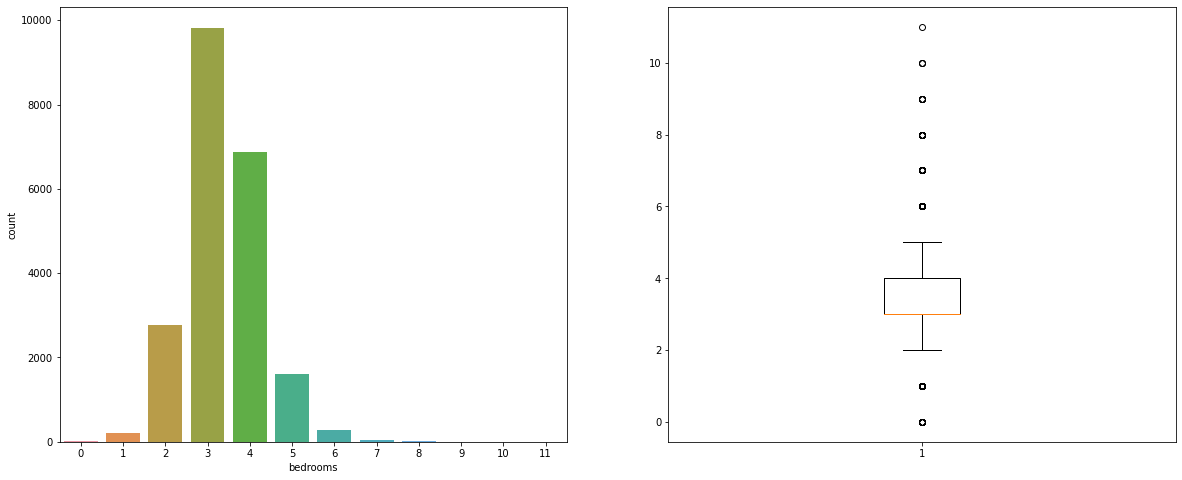

In [23]:
# univariate analysis variabel 'bedrooms'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)

#plot kiri
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bedrooms'])

#plot kanan
f.add_subplot(1,2,2)
#membuat boxplot untuk variabel 'bedrooms'
plt.boxplot(dataFrame['bedrooms'])
plt.show()

informasi:
- kebanyakan jumlah bedrooms dalam rumah adalah 3 dan 4
- banyak memiliki outliers dilihat dari data diluar garis minimum dan maksimum

univariate analysis variabel 'bathrooms'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


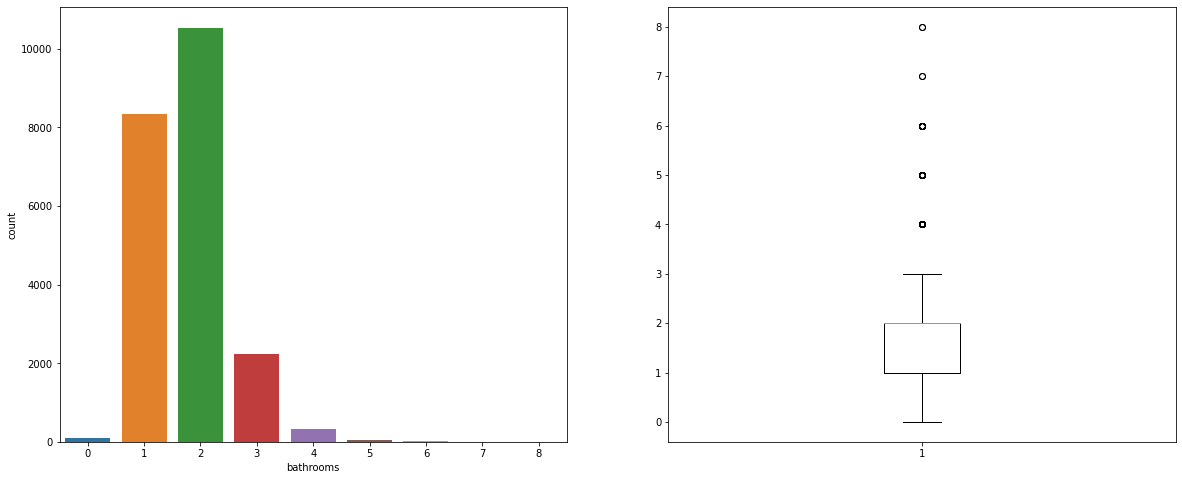

In [24]:
# univariate analysis variabel 'bathrooms'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['bathrooms'])

#membuat boxplot untuk variabel 'bathrooms'
f.add_subplot(1,2,2)
plt.boxplot(dataFrame['bathrooms'])


plt.show()

In [25]:
#melihat nilai tertinggi pada kolom 'bathrooms'
dataFrame['bathrooms'].value_counts().sort_index(ascending=True)

0       86
1     8354
2    10542
3     2228
4      338
5       48
6       12
7        2
8        2
Name: bathrooms, dtype: int64

informasi:
- kebanyakan jumlah bathrooms dalam rumah adalah 1 dan 2
- ada beberapa outliers dilihat dari data diluar garis maksimum

univariate analysis variabel 'sqft_living'

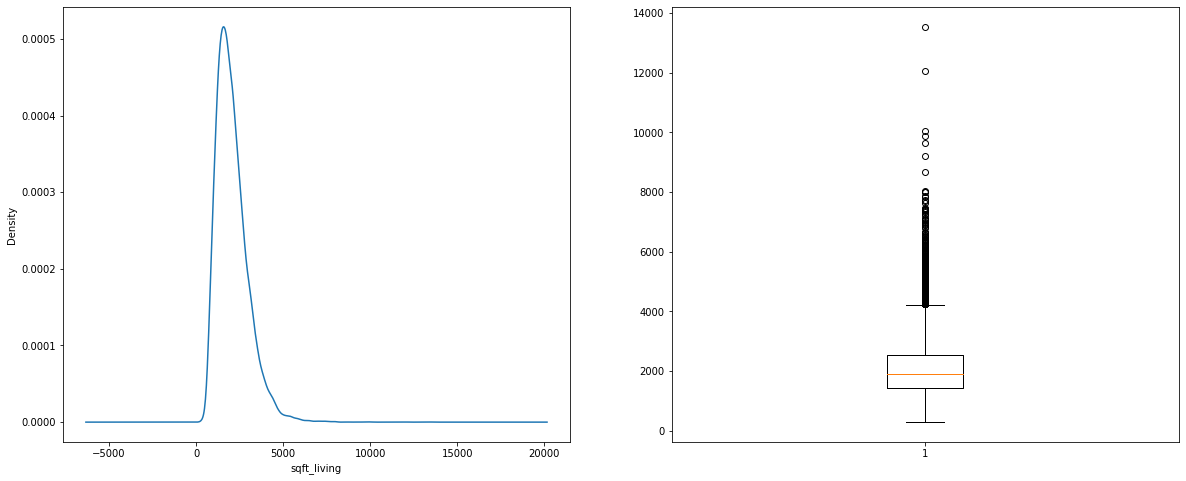

In [26]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living'].plot(kind='kde')
plt.xlabel('sqft_living')

f.add_subplot(1,2,2)
#membuat boxplot untuk variabel 'sqft_living'
plt.boxplot(dataFrame['sqft_living'])
plt.show()

informasi:
- density(kepadatan) dari luas rumah(sqft_living) ada di angka 2000an
- dilihat dari boxplot, ada banyak outliers di atas garis maksimum

univariate analysis variabel 'sqft_above'

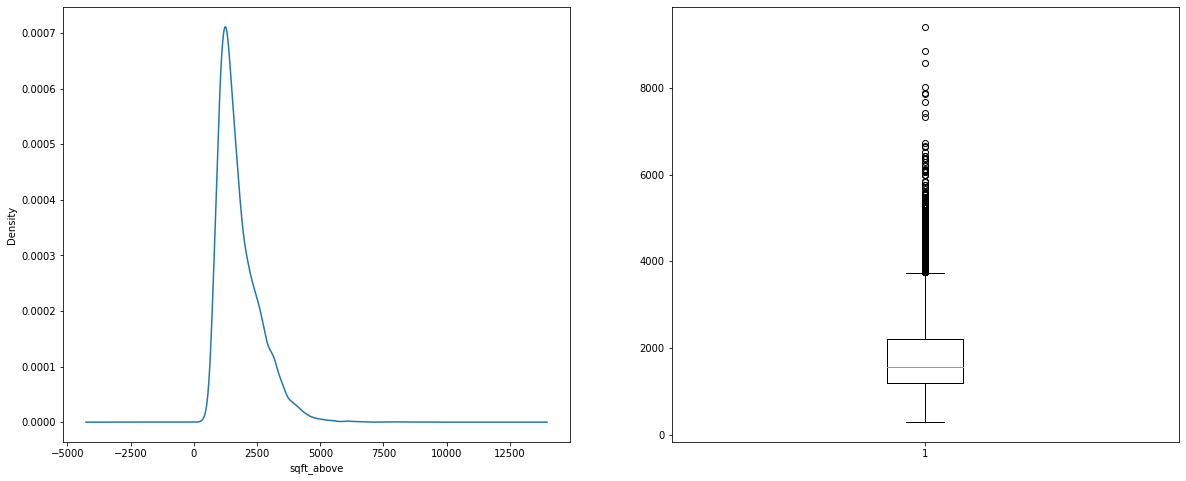

In [27]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_above'].plot(kind='kde')
plt.xlabel('sqft_above')

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['sqft_above'])
plt.show()

informasi:
- density(kepadatan) dari luas rumah(sqft_above) ada di angka 1500an
- dilihat dari boxplot, ada banyak outliers di atas garis maksimum

univariate analysis variabel 'sqft_living15'

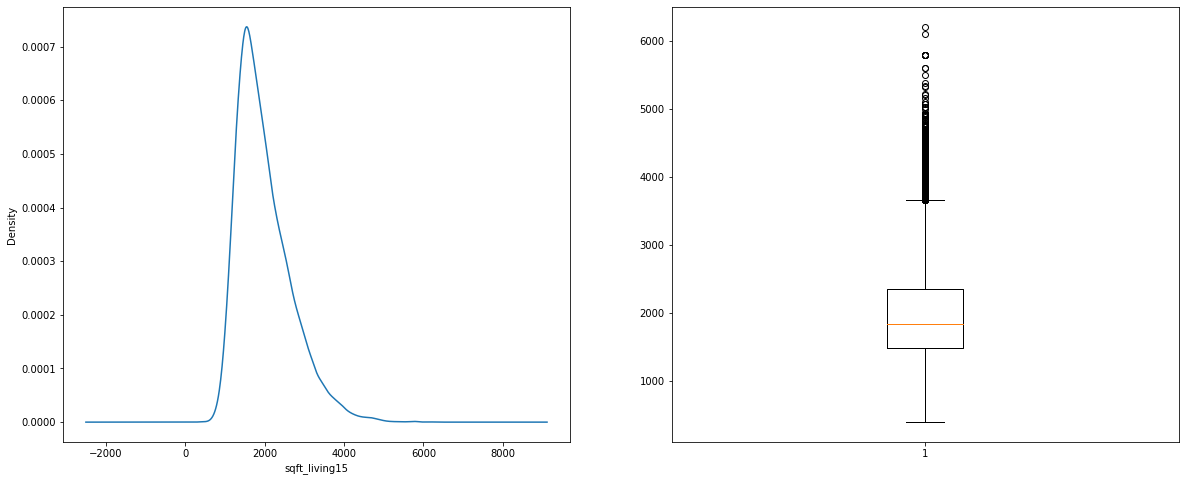

In [28]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living15'].plot(kind='kde')
plt.xlabel('sqft_living15')

f.add_subplot(1,2,2)
plt.boxplot(dataFrame['sqft_living15'])
plt.show()

informasi:
- density(kepadatan) dari luas rumah(sqft_living15) ada di angka 1500an
- dilihat dari boxplot, ada banyak outliers di atas garis maksimum

kepadatan antara 'sqft_living', 'sqft_above', dan 'sqft_living15' memiliki kemiripan

univariate analysis variabel 'grade'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


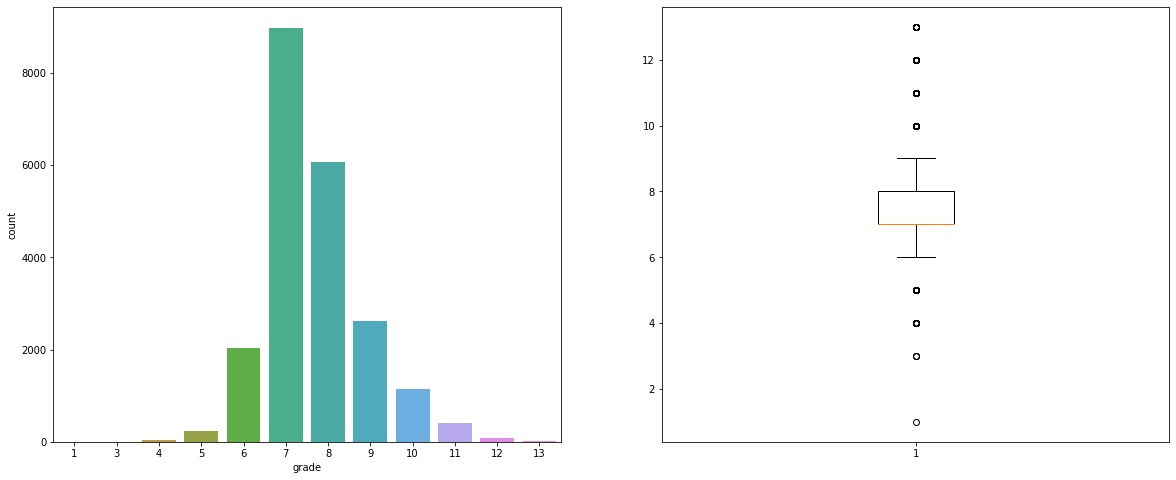

In [29]:
# #univariate analysis variabel 'grade'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['grade'])

#membuat boxplot untuk variabel 'grade'
f.add_subplot(1,2,2)
plt.boxplot(dataFrame['grade'])
plt.show()

In [30]:
dataFrame['grade'].value_counts().sort_index(ascending = True)

1        1
3        3
4       29
5      242
6     2038
7     8980
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

informasi:
- kebanyakan rumah memiliki grade 7 dan 8
- boxplot menunjukkan ada outlier di bawah garis minimum dan diatas garis maksimum

univariate analysis variabel 'floors'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


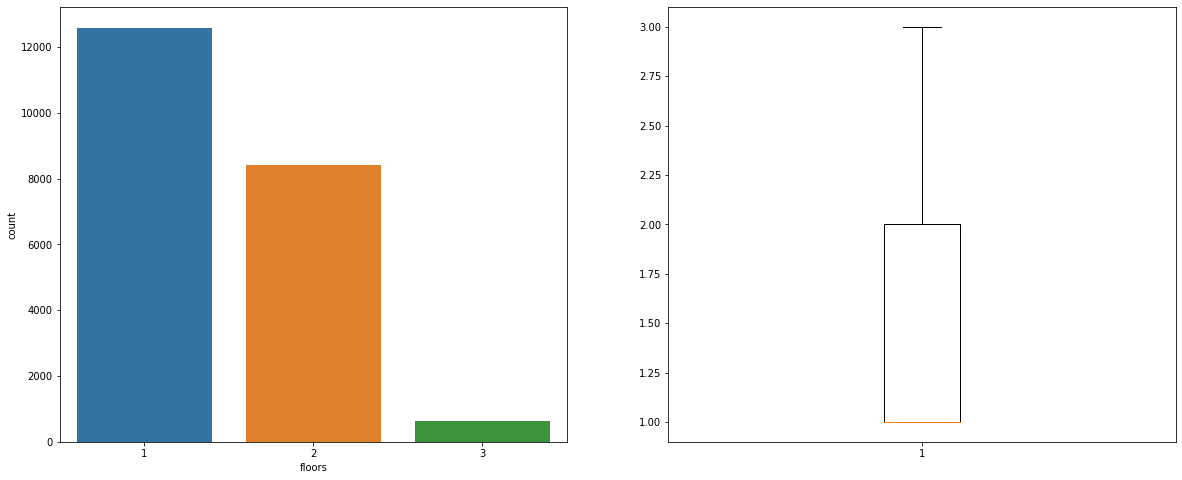

In [31]:
# univariate analysis variabel 'floors'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
sns.countplot(dataFrame['floors'])

#membuat boxplot untuk variabel 'floors'
f.add_subplot(1,2,2)
plt.boxplot(dataFrame['floors'])
plt.show()

In [32]:
dataFrame['floors'].value_counts().sort_index(ascending = True)

1    12589
2     8402
3      621
Name: floors, dtype: int64

informasi:
- kebanyakan rumah memiliki 1 lantai

### Bivariate analysis 
#### Bivariate analysis berfungsi untuk melihat hubungan antara variabel satu dengan variabel lain, dalam kasus ini adalah variabel indepen terhadap variabel dependen(price)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


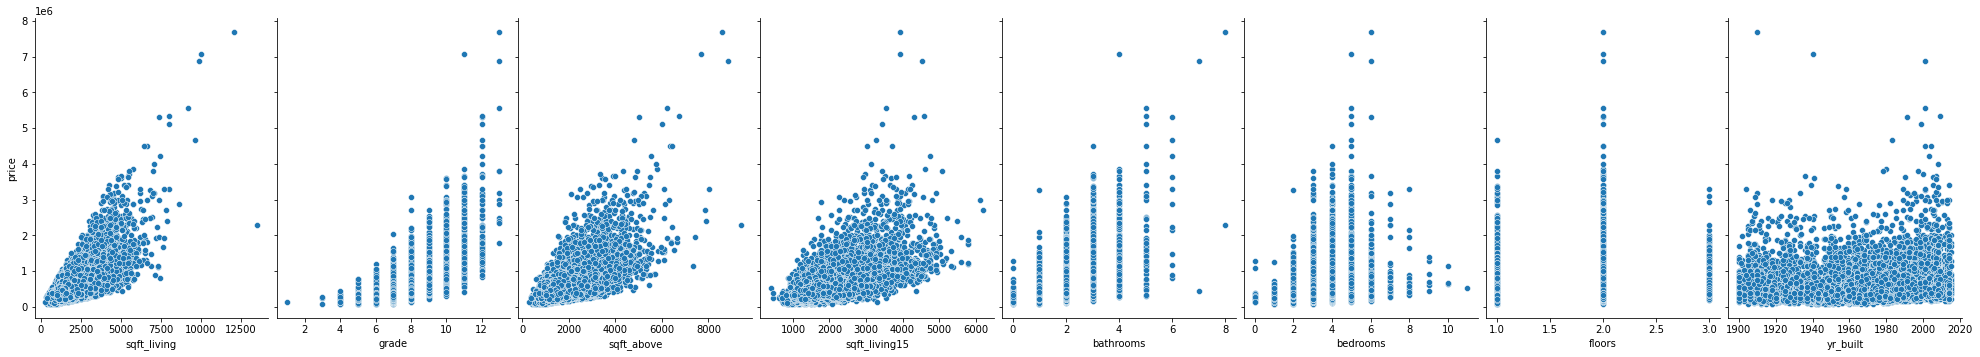

In [33]:
plt.Figure(figsize=(10, 8))
sns.pairplot(data=dataFrame,
             x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms','floors', 'yr_built'], 
             y_vars=['price'],
             size=5,
             aspect=0.7)

informasi:
- 'sqft_living' hingga 6000 memiliki kepadatan yang tinggi, harga rumah memiliki variasi yang lebih pada ukuran 'sqft_living' tersebut
- semakin tinggi 'grade' maka semakin bervariasi harga dari rumah, namun semakin tinggi 'grade' data tersebut semakin jarang
- 'sqft_above' memiliki persebaran yang mirip dengan 'sqft_living'
- 'sqft_living15' memiliki persebaran yang lebih luas dibanding 'sqft_living' dan 'sqft_above'
- Semakin banyak jumlah 'bathrooms' maka semakin bervariasi harga dari rumah
- rumah dengan jumlah 'bedrooms' 5 dan 6 justru memiliki harga yang lebih tinggi dibanding rumah dengan 'bedrooms' yang lebih banyal
- 'floors' dengan angka 2 memiliki harga yang lebih bervariasi dan lebih tinggi dibanding 1 dan 3

Melihat variabel yang paling berpengaruh terhadap harga

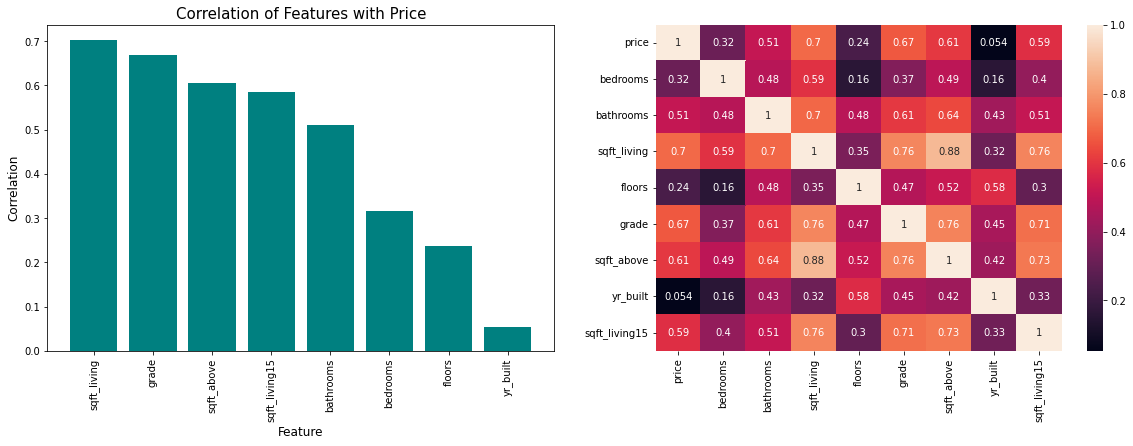

In [34]:
# Melihat variabel yang paling berpengaruh terhadap harga
cor = dataFrame.corr()['price'].sort_values(ascending=False).drop(['price'])
f=plt.figure(figsize=(20,6))

f.add_subplot(1,2,1)
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)

f.add_subplot(1,2,2)
sns.heatmap(dataFrame.corr(), annot=True)

plt.show()

dari seluruh variabel yang telah dipilih, variabel 'sqft_living' memiliki pengaruh paling tinggi terhadap harga, sedangkan variabel 'floors' memiliki pengaruh paling rendah terhadap harga

## 3. Modelling

Dalam proses ini kita akan melakukan pembagian data menjadi data train dan data test, kemudian membandingkan akurasi dari beberapa algoritma regression

In [35]:
#melihat 10 data pertama
dataFrame.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1,1180,1,7,1180,1955,1340
1,538000.0,3,2,2570,2,7,2170,1951,1690
2,180000.0,2,1,770,1,6,770,1933,2720
3,604000.0,4,3,1960,1,7,1050,1965,1360
4,510000.0,3,2,1680,1,8,1680,1987,1800
5,1225000.0,4,4,5420,1,11,3890,2001,4760
6,257500.0,3,2,1715,2,7,1715,1995,2238
7,291850.0,3,1,1060,1,7,1060,1963,1650
8,229500.0,3,1,1780,1,7,1050,1960,1780
9,323000.0,3,2,1890,2,7,1890,2003,2390


In [36]:
#melihat 10 data terakhir
dataFrame.tail(10)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
21603,507250.0,3,2,2270,2,8,2270,2003,2270
21604,429000.0,3,2,1490,3,8,1490,2014,1400
21605,610685.0,4,2,2520,2,9,2520,2014,2520
21606,1007500.0,4,3,3510,2,9,2600,2009,2050
21607,475000.0,3,2,1310,2,8,1180,2008,1330
21608,360000.0,3,2,1530,3,8,1530,2009,1530
21609,400000.0,4,2,2310,2,8,2310,2014,1830
21610,402101.0,2,0,1020,2,7,1020,2009,1020
21611,400000.0,3,2,1600,2,8,1600,2004,1410
21612,325000.0,2,0,1020,2,7,1020,2008,1020


Membuat variabel 'X' sebagai variabel independen, variabel diambil dari data yang sudah ada, variabel 'price' dihilangkan karena merupakan variabel dependen

Variabel 'y' berisi variabel 'price' sebagai variabel dependen

In [37]:
# X(Independent variables) and y(target variables) 
X = dataFrame[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_living15', 'yr_built']]
y = dataFrame['price']

In [38]:
X

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
0,3,1,1180,1,7,1180,1340,1955
1,3,2,2570,2,7,2170,1690,1951
2,2,1,770,1,6,770,2720,1933
3,4,3,1960,1,7,1050,1360,1965
4,3,2,1680,1,8,1680,1800,1987
...,...,...,...,...,...,...,...,...
21608,3,2,1530,3,8,1530,1530,2009
21609,4,2,2310,2,8,2310,1830,2014
21610,2,0,1020,2,7,1020,1020,2009
21611,3,2,1600,2,8,1600,1410,2004


In [39]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21612, dtype: float64

import train_test_split dari sklearn yang berfungsi membagi data yang kita gunakan menjadi data train dan data test

In [40]:
from sklearn.model_selection import train_test_split

split data training dan data testing dengan pembagian 70%(training) dan 30%(testing), pembagian data bisa bervariasi sesuai keinginan, umumnya dibagi menjadi 80 20 atau 70 30

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [42]:
#cek shape data train dan test
print("x_train: ", X_train.shape)
print("x_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (15128, 8)
x_test:  (6484, 8)
y_train:  (15128,)
y_test:  (6484,)


In [43]:
X_train

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
2934,4,2,2100,2,8,2100,2090,2002
2564,4,3,3900,1,10,2520,3410,1972
11954,5,1,1990,1,7,1990,2240,1955
20158,2,1,830,2,7,830,830,2006
4954,3,2,1800,1,8,1800,2480,1976
...,...,...,...,...,...,...,...,...
14565,5,3,3800,1,7,2490,2000,1965
15649,4,1,1940,1,8,1940,2405,1974
10123,3,2,1890,2,8,1890,2460,2000
5600,4,3,4020,2,11,4020,3930,2001


In [44]:
X_test

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
5533,3,1,1660,1,7,960,1510,1941
625,3,1,960,1,6,820,1200,1944
14950,3,1,850,1,7,850,850,1986
13654,3,2,1860,1,7,1860,1815,1976
3929,3,2,1590,1,7,1100,2060,1976
...,...,...,...,...,...,...,...,...
8614,3,1,1730,1,7,1480,1730,1941
15978,4,2,2643,2,8,2643,2406,2012
12084,3,1,2400,1,7,1200,1460,1961
19119,4,2,2810,2,9,2810,2990,1993


In [45]:
X_test.head(10)

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
5533,3,1,1660,1,7,960,1510,1941
625,3,1,960,1,6,820,1200,1944
14950,3,1,850,1,7,850,850,1986
13654,3,2,1860,1,7,1860,1815,1976
3929,3,2,1590,1,7,1100,2060,1976
10965,2,1,940,1,5,940,1490,1942
8359,4,2,2360,1,6,1180,1340,1925
18853,3,2,2160,2,8,2160,2230,1982
864,4,2,2050,2,8,2050,2050,1990
11703,3,3,1670,1,7,1140,1010,1929


In [46]:
y_test.head(10)

5533     530000.0
625      289500.0
14950    295000.0
13654    267500.0
3929     405000.0
10965    283000.0
8359     459000.0
18853    475000.0
864      280000.0
11703    294000.0
Name: price, dtype: float64

In [47]:
y_train

2934      380000.0
2564     1620000.0
11954     185000.0
20158     205000.0
4954      474900.0
           ...    
14565     380000.0
15649     252000.0
10123     465000.0
5600     1691000.0
14000     470000.0
Name: price, Length: 15128, dtype: float64

In [48]:
y_test

5533     530000.0
625      289500.0
14950    295000.0
13654    267500.0
3929     405000.0
           ...   
8614     575700.0
15978    376950.0
12084    338000.0
19119    747500.0
11052    398000.0
Name: price, Length: 6484, dtype: float64

### Percobaan dengan beberapa algoritma regression

#### Linear Regression

In [49]:
#menggunakan model linear regression
#from sklearn.linear_model import LinearRegression

#linReg = LinearRegression()
#linReg.fit(X_train, y_train)

In [50]:
#print('akurasi dengan data train:', linReg.score(X_train, y_train)*100)

#### Gradient Boosting Regression

In [51]:
#menggunakan model gradient boosting regressor
#from sklearn.ensemble import GradientBoostingRegressor

#GBR = GradientBoostingRegressor(random_state=50, n_estimators=300)
#GBR.fit(X_train, y_train)

In [52]:
#print('akurasi dengan data train:', GBR.score(X_train, y_train)*100)

#### Random Forest Regression

In [53]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

RFG = RandomForestRegressor(n_estimators=300,random_state=50)
RFG.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=50)

In [54]:
print('akurasi dengan data train:', RFG.score(X_train, y_train)*100)

akurasi dengan data train: 95.57677709489144


Dari hasil percobaan ketiga algoritma, algoritma dengan akurasi paling tinggi adalah Random Forest Regression

kesimpulan:
dengan beberapa percobaan menambah variabel, hasil yang diperoleh adalah:
- akurasi tertinggi(dengan data train): 95.57677709489144


Cek MAPE dan R Square

In [55]:
#cek MAPE dan r2 untuk random forest regressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

print("mean absolute percentage error:", mean_absolute_percentage_error(y_test, RFG.predict(X_test))*100)
print("r2 score:", r2_score(y_test, RFG.predict(X_test))*100)

mean absolute percentage error: 25.48307354803152
r2 score: 70.2785467115288


Mean Absolute Percentage Error (MAPE):
- MAPE (Mean Absolute Percent Error) digunakan jika ukuran variabel peramalan merupakan faktor penting dalam mengevaluasi akurasi peramalan tersebut. MAPE memberikan petunjuk seberapa besar kesalahan peramalan dibandingkan dengan nilai sebenarnya

- Berdasarkan Lewis (1982), nilai MAPE dapat diinterpretasikan atau ditafsirkan ke dalam 4 kategori yaitu: <10% = sangat akurat. 10-20% = baik. 20-50% = wajar, >50% = buruk.


R2 (R squared score):
- R squared merupakan angka yang berkisar antara 0 sampai 1 (0 sampai 100 jika dalam persen) yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik.

- Menurut Chin (1998), nilai R-Square dikategorikan kuat jika lebih dari 0,67, moderat jika lebih dari 0,33 tetapi lebih rendah dari 0,67, dan lemah jika lebih dari 0,19 tetapi lebih rendah dari 0,33.

Sample dari harga asli dan harga prediksi

In [56]:
# Sample dari harga asli dan harga prediksi
y_pred = RFG.predict(X_test)
y_df = pd.DataFrame(y_test)
y_df['PredictedPrice']=y_pred
y_df.head(10)

,price,PredictedPrice
5533,530000.0,512195.206667
625,289500.0,279400.071111
14950,295000.0,306465.666667
13654,267500.0,369827.893333
3929,405000.0,355514.620000
10965,283000.0,302427.866667
8359,459000.0,409585.323810
18853,475000.0,534795.601111
864,280000.0,518530.706667
11703,294000.0,468958.693333


In [57]:
y_df

,price,PredictedPrice
5533,530000.0,512195.206667
625,289500.0,279400.071111
14950,295000.0,306465.666667
13654,267500.0,369827.893333
3929,405000.0,355514.620000
...,...,...
8614,575700.0,504213.160000
15978,376950.0,496745.015000
12084,338000.0,395458.111111
19119,747500.0,684488.816667


Melihat rata-rata persentase selisih antara price dan PredictedPrice

In [58]:
#melihat rata-rata persentase selisih antara price dan PredictedPrice
y_df['Difference'] = (y_df['PredictedPrice']-y_df['price'])
y_df['Difference'] = y_df['Difference']/y_df['price']*100 
selisih = y_df['Difference'].mean()
print('rata-rata persentase selisih antara harga asli dan harga prediksi: ', selisih, '%')

rata-rata persentase selisih antara harga asli dan harga prediksi:  8.964860987347253 %


Mencoba beberapa inputan dan melihat prediksi

In [59]:
# 'bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above, 'sqft_living15, 'yr_built'

print("1.")
print("harga aktual: 530000")
harga_pred = RFG.predict([[3,	1,	1660,	1,	7,	960,	1510,	1941]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-530000)/530000)*100, "%")

1.
harga aktual: 530000
harga prediksi: [512195.20666667]
persentase perbedaan: [-3.35939497] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Plot antara harga prediksi dengan harga real

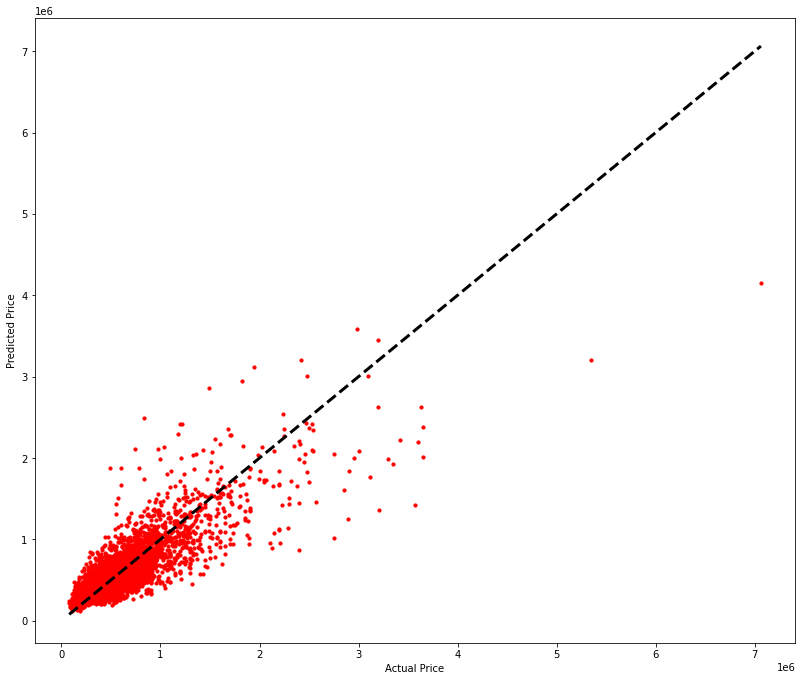

In [60]:
#melihat plot antara harga prediksi dengan harga real
f = plt.figure(figsize=(30,11.5))

f.add_subplot(1,2,1)
plt.scatter(y_test, RFG.predict(X_test), color='red', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Jika plot semakin rapat dengan garis putus-putus, maka menunjukkan bahwa harga prediksi dan harga aktual memiliki selisih yang kecil

In [61]:
#melihat variance score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print("variance score:", explained_variance_score(y_test, RFG.predict(X_test)))
print("mean squared error:", mean_squared_error(y_test, RFG.predict(X_test)))
print("r2 score:", r2_score(y_test, RFG.predict(X_test)))


variance score: 0.7027867070292917
mean squared error: 40514109938.98212
r2 score: 0.702785467115288


## 4. SIMPAN MODEL KE DALAM FILE PICKLE
Model disimpan agar dapat digunakan untuk melakukan prediksi tanpa harus training ulang model, dan bisa digunakan di berbagai platform seperti website

In [62]:
import pickle

Membuat variabel 'filename' yang berisi nama file yang akan digunakan untuk menyimpan model

pickle.dump untuk menyimpan hasil training ke dalam file pickle yang telah dibuat

In [63]:
#menyimpan model ke dalam file pickle
#filename = 'model_prediksi_rumah_new.pkl'
#pickle.dump(RFG, open(filename, 'wb'))

In [64]:
#mencoba dengan joblib
#from sklearn.externals import joblib
import joblib

#filename = 'model_prediksi_rumah_joblib.pkl'
joblib.dump(RFG, 'model_prediksi_rumah_joblib.pkl', compress=9)

['model_prediksi_rumah_joblib.pkl']

Mencoba model yang telah disimpan

In [65]:
#loaded_model = pickle.load(open('model_prediksi_rumah_new.pkl', 'rb'))
# 'bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above, 'sqft_living15, 'yr_built'
#print(loaded_model.predict([[3,	1,	1660,	1,	7,	960,	1510,	1941]]))

In [66]:
#prediksi dengan 'model_prediksi_rumah_joblib.pkl'
loaded_model = joblib.load('model_prediksi_rumah_joblib.pkl')
print(loaded_model.predict([[3,	1,	1660,	1,	7,	960,	1510,	1941]]))

[512195.20666667]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Model berhasil untuk dijalankan

menyimpan data yang telah dimodifikasi dan digunakan untuk training

In [67]:
#eksport dataFrame menjadi file csv

dataFrame.to_csv('dataFrame_test_train_new.csv')

catatan:
Model ini dapat dikembangkan lagi seperti meningkatkan akurasi, r2 score, menurunkan skor MAPE hingga di bawah 10% dengan pendekatan-pendekatan lain seperti mengubah algoritma, parameter, jumlah variabel, dan lain sebagainya

Model yang telah disimpan akan digunakan dalam website sehingga user lebih mudah dalam mendapatkan hasil prediksi

link website: https://house-predict1.herokuapp.com/

In [68]:
! pip install streamlit -q

     |████████████████████████████████| 9.1 MB 38.9 MB/s 
     |████████████████████████████████| 235 kB 69.8 MB/s 
     |████████████████████████████████| 164 kB 78.8 MB/s 
     |████████████████████████████████| 181 kB 72.5 MB/s 
     |████████████████████████████████| 4.3 MB 59.8 MB/s 
     |████████████████████████████████| 78 kB 9.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 85.7 MB/s 
     |████████████████████████████████| 51 kB 8.2 MB/s 


In [69]:
%%writefile app.py
import streamlit as st

import streamlit as st
import pandas as pd
import time
import matplotlib.pyplot as plt
import joblib

#load model yang sudah di train
#pickle_in = open("model_prediksi_rumah_new.pkl", "rb")
#random_forest_regression_model = pickle.load(pickle_in)

loaded_model = joblib.load('model_prediksi_rumah_joblib.pkl')


def Home():
    return ('Sabar gan')
#'bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above, 'sqft_living15', 'yr_built'
def predicting(bedrooms, bathrooms, sqft_living,  floors, grade, sqft_above, sqft_living15, yr_built):
    prediction = loaded_model.predict([[bedrooms, bathrooms, sqft_living,  floors, grade, sqft_above, sqft_living15, yr_built]])
    output = round(prediction[0], 2)
    return output
# 'bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above, 'sqft_living15, 'yr_built'
def main():
    html_temp = """
    <div style="background-color:navy;padding:10px">
    <h1 style="color:white;text-align:center;">Prediksi Harga Rumah ($) </h1>
    </div>
    """

    st.markdown(html_temp, unsafe_allow_html=True)
    
    st.subheader("Jumlah Kamar") #bedrooms
    bedrooms = st.slider("", min_value=0, max_value=11, value=0, step=1)

    st.subheader("Jumlah Kamar Mandi") #bathrooms
    bathrooms = st.slider("", min_value=0, max_value=8, value=0, step=1)

    st.subheader("Luas") #sqft_living
    sqft_living = st.text_input("luas bangunan secara keseluruhan (sqft)", "")

    st.subheader("Jumlah Lantai") #floors
    floors = st.slider("", min_value=1, max_value=3, value=1, step=1)

    st.subheader("Kelas / Grade") #grade
    grade = st.slider("", min_value=1, max_value=13, value=1, step=1)

    st.subheader("Luas bangunan di atas tanah")#sqft_above
    sqft_above = st.text_input("(sqft)", "")

    st.subheader("Rata-rata luas sekitar") #sqft_living15
    sqft_living15 = st.text_input("rata-rata luas tanah 15 tetangga terdekat (sqft)", "")

    st.subheader("Tahun Dibangun") #yr_built
    yr_built = st.text_input("tahun rumah dibangun", "")
    
    result = ""
    if st.button("Perkiraan harga"):

        my_bar = st.progress(0)
        for percent_complete in range(100):
            time.sleep(0.01)
            my_bar.progress(percent_complete + 1)
        result = predicting(bedrooms, bathrooms, sqft_living, floors, grade, sqft_above, sqft_living15, yr_built)

    st.success('Hasil Prediksi : {} Dollars'.format(result))


nav = st.sidebar.radio("Halaman", ["Home", "Data Sample", "About Me"])
if nav == "Home":
    if __name__ == "__main__":
        main()

if nav == "Data Sample":
    st.title("Data Sample")
    data = pd.read_csv("dataFrame_test_train_new.csv", usecols=['bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above', 'sqft_living15', 'yr_built'])
    st.table(data.sample(100))
    plt.show()

# 'bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above, 'sqft_living15, 'yr_built'
if nav == "About Me":
    st.title(" Prediksi Harga Rumah")
    st.subheader("Gilang Agung Saputra (672019229)")
    

Writing app.py


In [70]:
# ! streamlit run app.py

In [ ]:
!streamlit run app.py & npx localtunnel  --port 8501

2022-08-26 01:06:16.151 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.312s
your url is: https://lovely-cases-rush-35-245-51-218.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.51.218:8501

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
